#CSI - Reverb

Link to GitHub repository: [Here](https://github.com/kika007/Reverb_notebook/tree/main)

Author: Bc. Kristína Niková

In [90]:
# @title Importing libraries
import librosa
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

In [91]:
# @title Cloning a Git Repository
!git clone https://github.com/kika007/Reverb_notebook.git

fatal: destination path 'Reverb_notebook' already exists and is not an empty directory.


In [92]:
# @title Setting and Limiting the Reverb Ratio
ratio = 0.9
ratio = np.clip(ratio, 0, 1)

In [93]:
# @title Defining Impulse Responses and Loading Audio
impulse_responses = {
    'big_hall': '/content/Reverb_notebook/Impulse_response/BIG HALL.wav',
    'medium_room': '/content/Reverb_notebook/Impulse_response/MEDIUM DAMPING ROOM.wav',
    'small_church': '/content/Reverb_notebook/Impulse_response/SMALL CHURCH.wav'
}

audio_files = {
    'guitar_1': '/content/Reverb_notebook/Audio_samples/clean-guitar-1.wav',
    'guitar_2': '/content/Reverb_notebook/Audio_samples/clean-guitar-2.wav'
}


dry_signal , SR_audio = sf.read(audio_files['guitar_1'])

impulse_response, SR_response = sf.read(impulse_responses['big_hall'])

Here you can select different audio samples and impulse responses.

In [94]:
# @title Audio Preprocessing
if dry_signal.ndim == 2 and dry_signal.shape[1] == 2:
    dry_signal = np.mean(dry_signal, axis=1)

if impulse_response.ndim == 2 and impulse_response.shape[1] == 2:
    impulse_response = np.mean(impulse_response, axis=1)

if SR_response != SR_audio:
    impulse_response = librosa.resample(impulse_response, orig_sr=SR_response, target_sr=SR_audio)
    SR_response = SR_audio


In this cell, we handle stereo audio and sample rate matching.


In [95]:
# @title Reverb Function
def apply_reverb(dry_signal, impulse_response, ratio):

    wet_signal = signal.convolve(dry_signal, impulse_response, mode='full')

    dry_signal_normalized = dry_signal / np.max(np.abs(dry_signal))

    dry_signal_padded = np.pad(dry_signal_normalized, (0, len(wet_signal) - len(dry_signal_normalized)), 'constant', constant_values=0)

    wet_signal /= np.max(np.abs(wet_signal))

    mixed_signal = (1 - ratio) * dry_signal_padded + ratio * wet_signal

    mixed_signal /= np.max(np.abs(mixed_signal))

    return mixed_signal, dry_signal_normalized

In essence, this function takes a dry audio signal, applies a reverb effect using an impulse response, adjusts the reverb amount with the ratio, and returns the processed audio. It also includes normalization.

In [96]:
# @title Applying Reverb
wet_signal, dry_signal = apply_reverb(dry_signal, impulse_response, ratio)

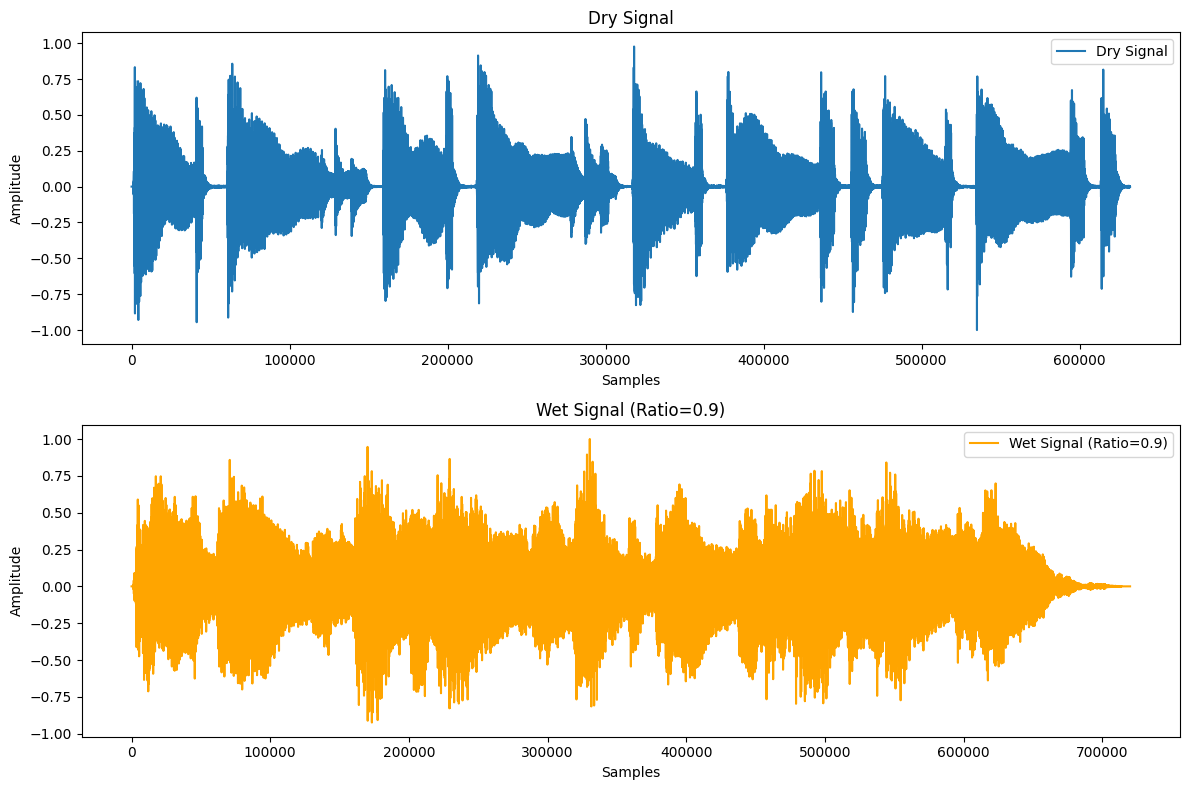

In [97]:
# @title Ploting Wet and Dry Signals
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# PLOT DRY SIGNAL
ax[0].plot(dry_signal, label="Dry Signal")
ax[0].set_title("Dry Signal")
ax[0].set_xlabel("Samples")
ax[0].set_ylabel("Amplitude")
ax[0].legend()

# PLOT WET SIGNAL
ax[1].plot(wet_signal, label=f"Wet Signal (Ratio={ratio})", color='orange')
ax[1].set_title(f"Wet Signal (Ratio={ratio})")
ax[1].set_xlabel("Samples")
ax[1].set_ylabel("Amplitude")
ax[1].legend()

plt.tight_layout()
plt.show()

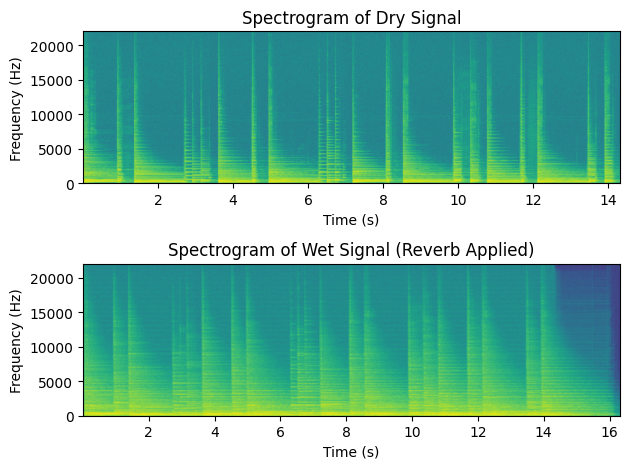

In [98]:
# @title Dry and Wet Spectrograms
#DRY SIGNAL SPECTROGRAM
plt.subplot(2, 1, 1)
plt.specgram(dry_signal, NFFT=1024, Fs=SR_audio, noverlap=512, cmap='viridis')
plt.title("Spectrogram of Dry Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

#WET SIGNAL SPECTROGRAM
plt.subplot(2, 1, 2)
plt.specgram(wet_signal, NFFT=1024, Fs=SR_audio, noverlap=512, cmap='viridis')
plt.title("Spectrogram of Wet Signal (Reverb Applied)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()

In [101]:
# @title Play Dry Signal
Audio(dry_signal, rate=SR_audio)

In [102]:
# @title Play Wet Signal
Audio(wet_signal, rate=SR_audio)